# Elliptic Dataset

##### Important Links:
- https://www.kaggle.com/datasets/ellipticco/elliptic-data-set
- https://medium.com/elliptic/the-elliptic-data-set-opening-up-machine-learning-on-the-blockchain-e0a343d99a14
- https://www.youtube.com/watch?v=HtJeXPr_PBY&t=571s

##### Papers to be referenced:
- Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional Networks for Financial Forensics
- Machine learning methods to detect money laundering in the
Bitcoin blockchain in the presence of label scarcity

#### Desciption:
(Description copy pasted from Medium Website and https://www.kaggle.com/code/smlopezza/elliptic-data-set-eda-graphs-random-forest)
- The Elliptic Data Set is a sub-graph of the bitcoin graph, made of 203,769 nodes and 234,355 edges.
- 2% (4,545) of the nodes are labelled class1 (illicit); 21% (42,019) are labelled class2 (licit). No information is given on the other nodes, which are classified as “unknown”.
- Features: Each node has associated 166 features. 94 represent local information (timestep, number of inputs/outputs, transaction fee, output volume and aggregated figures) and 72 features represent aggregated features (obtained by aggregating transaction information such as maximum, minimum, standard deviation, correlation coefficients of neighbor transactions.
- Temporal Information: A time step is associated with each node, representing an stimated of the time when the transaction is confirmed. There are 49 distinct timesteps evenly spaced with an interval of 2 weeks.


#### Implementation:
- Data Cleaning
- EDA
- Model testing
    - ML Models
    - DL Models
- Performance Evaluation
- Comparisons and Visualisation


In [15]:
#IMPORTS:

import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import networkx as nx
import numpy as np
np.random.seed(42)
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, GaussianNB
from sklearn.cluster import KMeans 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from glob import glob 
import matplotlib.image as mpimg
from skimage.io import imread 
import tensorflow as tf
assert tf.__version__ >= "2.0"
from skimage import io
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, average_precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, Activation)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

- elliptic_txs_edgelist.csv contains graph edges information
- elliptic_txs_classes.csv contains information about legality of transactions
- elliptic_txs_features.csv contains information about transaction features

In [2]:
raw_features = pd.read_csv("C:/Users/HP/Desktop/elliptic_bitcoin_dataset/elliptic_txs_features.csv")

raw_classes = pd.read_csv("C:/Users/HP/Desktop/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")

raw_edgelist = pd.read_csv("C:/Users/HP/Desktop/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")

In [3]:
raw_classes['class'].value_counts()

unknown    157205
2           42019
1            4545
Name: class, dtype: int64

In [4]:
raw_classes.loc[raw_classes['class'] == 'unknown', 'class'] = 3

In [5]:
raw_features.columns = ['Id', 'time step'] + ['local_feature_' + str(i+1) for i in range(93)] + ['aggregat_features_' + str(i+1) for i in range(72)]

In [6]:
raw_features.head()

,Id,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,...,aggregat_features_63,aggregat_features_64,aggregat_features_65,aggregat_features_66,aggregat_features_67,aggregat_features_68,aggregat_features_69,aggregat_features_70,aggregat_features_71,aggregat_features_72
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


## Exploratory Data Analysis (EDA)

array([<AxesSubplot:ylabel='txId'>], dtype=object)

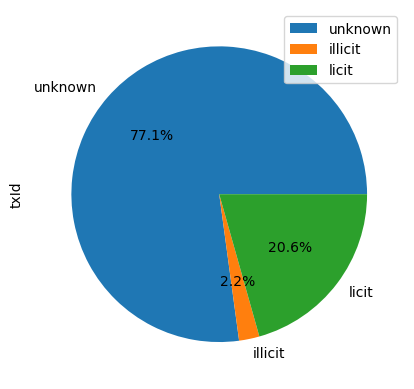

In [7]:
raw_classes.groupby(['class']).count().plot(kind='pie', labels=["unknown", "illicit", "licit"], autopct='%1.1f%%', subplots='True')

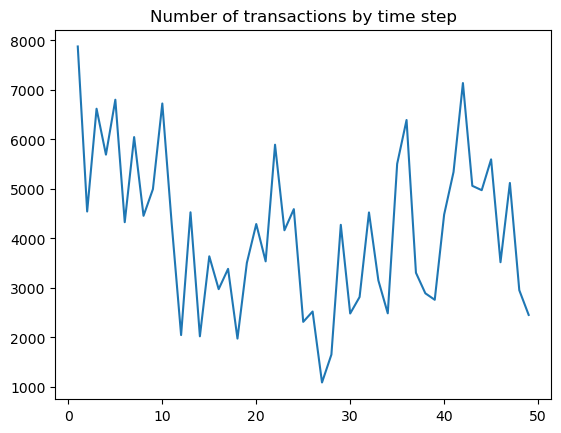

In [8]:
raw_features['time step'].value_counts().sort_index().plot();
plt.title('Number of transactions by time step');

In [9]:
# merge features with classes
raw_features = pd.merge(raw_features, raw_classes, left_on='Id', right_on='txId', how='left')
raw_features.head()

,Id,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,...,aggregat_features_65,aggregat_features_66,aggregat_features_67,aggregat_features_68,aggregat_features_69,aggregat_features_70,aggregat_features_71,aggregat_features_72,txId,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,5530458,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,232022460,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,232438397,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,230460314,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,230459870,3


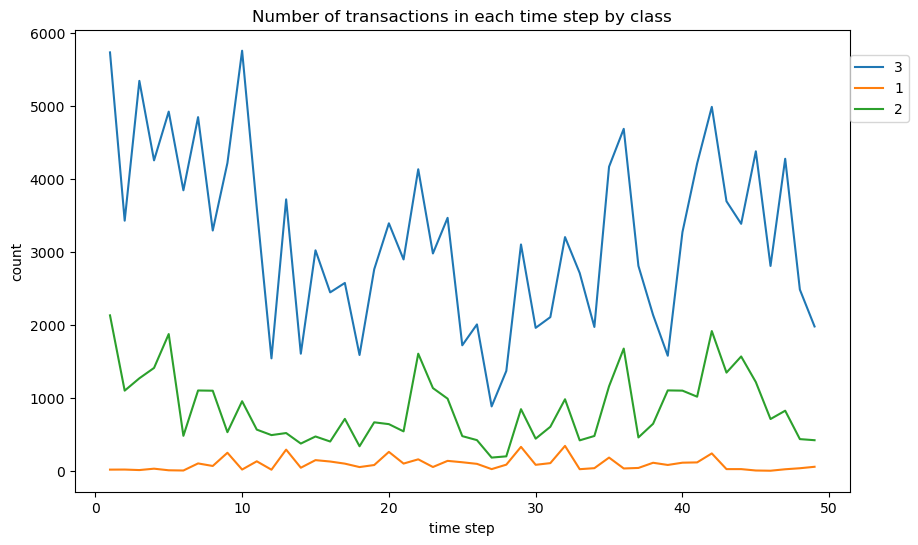

In [10]:
# Reference: https://www.kaggle.com/code/artgor/elliptic-data-eda

plt.figure(figsize=(10, 6))
grouped_df = raw_features.groupby(['time step', 'class'])['Id'].count().reset_index().rename(columns={'Id': 'count'})
sns.lineplot(x='time step', y='count', hue='class', data=grouped_df);
plt.legend(loc=(1.0, 0.8));
plt.title('Number of transactions in each time step by class');

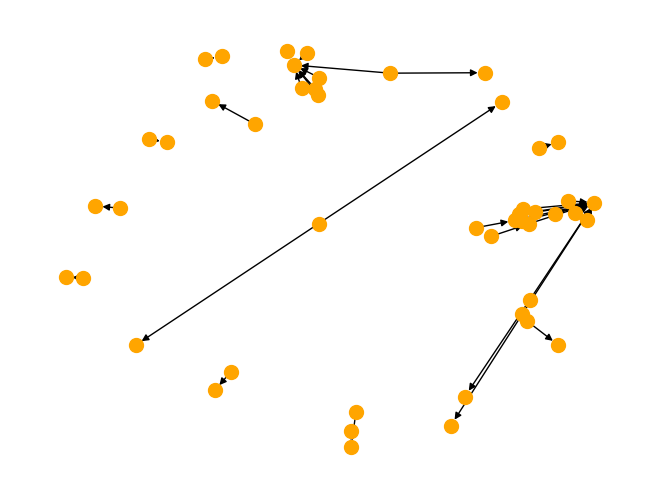

In [62]:
illicit_ids = raw_features.loc[(raw_features['time step'] == 41) & (raw_features['class'] == '1'), 'txId']
illicit_edges = raw_edgelist.loc[raw_edgelist['txId1'].isin(illicit_ids)]

G = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', create_using = nx.DiGraph())
pos = nx.spring_layout(G)
options = {"node_size": 100, "node_color": "orange"}
nx.draw(G, with_labels=False, pos=pos, **options)

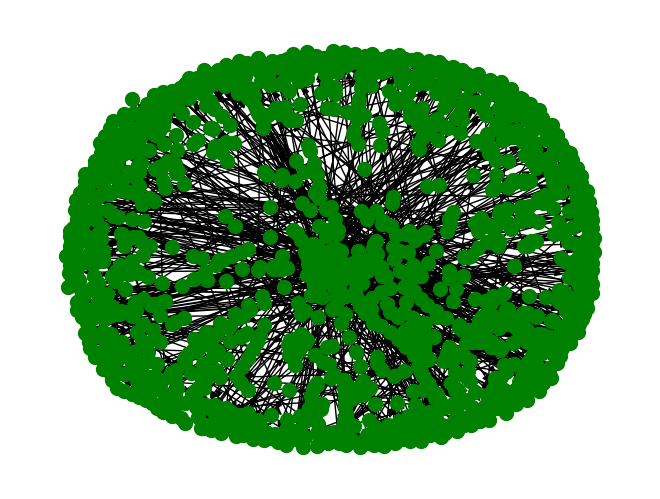

In [60]:
licit_ids = raw_features.loc[(raw_features['time step'] == 41) & (raw_features['class'] == '2'), 'txId']
licit_edges = raw_edgelist.loc[raw_edgelist['txId1'].isin(licit_ids)]

G = nx.from_pandas_edgelist(licit_edges, source = 'txId1', target = 'txId2', create_using = nx.DiGraph())
pos = nx.spring_layout(G)
options = {"node_size": 100, "node_color": "green"}
nx.draw(G, with_labels=False, pos=pos, **options)